# Exploration Notebook

## Learning the Dataset

Welcome to my exploration notebook for my basketball predictions project! This is where I will take time to learn more about the master datasets I hae created; moreover, my goal is to understand more about the data than what is on the surface through summary statistic and exploratory visualization methods.

## Methods

In [181]:
# data manipulation
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Data

In [182]:
# load data
master_df = pd.read_csv("/Users/trustanprice/Desktop/Personal/Basketball-Predictions/data/raw/master-stats/master_df.csv")
print(master_df.head())

   Season                   Team  GP     W     L   WIN%   Min    PTS   FGM  \
0    2025  Oklahoma City Thunder  82  68.0  14.0  0.829  48.1  120.5  44.6   
1    2025  Oklahoma City Thunder  82  68.0  14.0  0.829  48.1  120.5  44.6   
2    2025  Oklahoma City Thunder  82  68.0  14.0  0.829  48.1  120.5  44.6   
3    2025    Cleveland Cavaliers  82  64.0  18.0  0.780  48.2  121.9  44.5   
4    2025    Cleveland Cavaliers  82  64.0  18.0  0.780  48.2  121.9  44.5   

    FGA  ...  injury_rate            Coach  Yw/Franch  YOverall  CareerW  \
0  92.7  ...     0.411425  Mark Daigneault          5         5      211   
1  92.7  ...     0.411425  Mark Daigneault          5         5      211   
2  92.7  ...     0.411425  Mark Daigneault          5         5      211   
3  90.8  ...     0.469222   Kenny Atkinson          1         5      182   
4  90.8  ...     0.469222   Kenny Atkinson          1         5      182   

   CareerL  CareerW%  Pk  Coach_Count      Payroll  
0      189     0.528 

I will now create the training and testing data, making the training data 2016-2023 seasons (8 seasons) and the testing data 2024/2025 seasons (2 seasons). I am doing it like this because I am predicting for the seasons to come; therefore, I am trying to replicate the traditional 80/20 split while making it a time-based split.

In [183]:
# train/test split
master_test = master_df[master_df["Season"].isin([2024, 2025])]
master_train = master_df[~master_df["Season"].isin([2024, 2025])]

print("Train shape:", master_train.shape)
print("Test shape:", master_test.shape)

Train shape: (515, 55)
Test shape: (132, 55)


In [184]:
# Numeric features (continuous or counts)
numeric_features = [
    "GP", "W", "L", "WIN%", "Min", "PTS", "FGM", "FGA", "FG%",
    "3PM", "3PA", "3P%", "FTM", "FTA", "FT%", "OREB", "DREB",
    "REB", "AST", "TOV", "STL", "BLK", "BLKA", "PF", "PFD",
    "PLUS_MINUS", "Home_W", "Home_L", "Road_W", "Road_L",
    "E_W", "E_L", "W_W", "W_L", "Pre-ASG_W", "Pre-ASG_L",
    "Post-ASG_W", "Post-ASG_L", "SOS", "Yw/Franch", "YOverall",
    "CareerW", "CareerL", "CareerW%", "Pk", "Coach_Count", "Payroll",
    
    # Player-aggregated features
    "avg_age", "avg_pts_top10", "avg_production_score", "injury_rate"
]

# Categorical features (labels, identifiers, strings)
categorical_features = [
    "Season", "Team", "Coach"
]

# Define target column (example: predict wins, adjust if needed)
target_column = "W"


### Dataset Description  

The master dataset consists of NBA team performance, front-office, and aggregated player statistics from the 2016–2025 seasons. Each row represents a single team’s season, including statistical performance, coaching information, draft data, payroll, strength of schedule, and aggregated player-level metrics. The goal is to analyze team success and build predictive models for future performance.  

---

#### Response  
**W**  
[int64] Number of regular season wins for the team in a given season.  

---

## Features  

**Season**  
[int64] The NBA season year (e.g., 2016, 2017, …, 2025).  

**Team**  
[string] Full name of the NBA team (e.g., "Boston Celtics").  

**GP**  
[int64] Number of games played in the season.  

**L**  
[int64] Number of regular season losses.  

**WIN%**  
[float64] Win percentage for the season.  

**Min**  
[float64] Average minutes per game.  

**PTS**  
[float64] Points scored per game.  

**FGM / FGA / FG%**  
[float64] Field goals made, attempted, and field goal percentage.  

**3PM / 3PA / 3P%**  
[float64] Three-pointers made, attempted, and percentage.  

**FTM / FTA / FT%**  
[float64] Free throws made, attempted, and percentage.  

**OREB / DREB / REB**  
[int64] Offensive, defensive, and total rebounds per game.  

**AST / TOV / STL / BLK / BLKA**  
[int64] Assists, turnovers, steals, blocks, and blocks against.  

**PF / PFD**  
[int64] Personal fouls committed and fouls drawn.  

**PLUS_MINUS**  
[float64] Average point differential per game.  

**Home_W / Home_L**  
[int64] Wins and losses at home.  

**Road_W / Road_L**  
[int64] Wins and losses on the road.  

**E_W / E_L / W_W / W_L**  
[int64] Wins and losses vs Eastern and Western Conference opponents.  

**Pre-ASG_W / Pre-ASG_L / Post-ASG_W / Post-ASG_L**  
[int64] Wins and losses before and after the All-Star Game.  

**SOS**  
[float64] Strength of schedule, computed as the average win% of opponents.  

**Coach**  
[string] Head coach for the team in the given season.  

**Yw/Franch**  
[int64] Years the coach has been with the franchise.  

**YOverall**  
[int64] Total years of head coaching experience.  

**CareerW / CareerL / CareerW%**  
[int64 / float64] Career wins, losses, and win percentage of the coach.  

**Pk**  
[int64] Draft pick number for the team’s highest selection that year.  

**Coach_Count**  
[int64] Number of different head coaches the team had during the season.  

**Payroll**  
[float64] Total team payroll for the season in USD.  

---

### Aggregated Player Features  

**avg_age**  
[float64] Average age of all players on the roster.  

**avg_pts_top10**  
[float64] Average points per game of the team’s top 10 scorers.  

**avg_production_score**  
[float64] Custom metric combining player production (points, rebounds, assists, plus/minus) weighted by playing time.  

**injury_rate**  
[float64] Proportion of games missed by the team’s roster, normalized by season length and roster size.  

In [185]:
master_train.head()

,Season,Team,GP,W,L,WIN%,Min,PTS,FGM,FGA,...,injury_rate,Coach,Yw/Franch,YOverall,CareerW,CareerL,CareerW%,Pk,Coach_Count,Payroll
132,2023,Milwaukee Bucks,82,58.0,24.0,0.707,48.4,116.9,42.7,90.4,...,0.476771,Mike Budenholzer,5,10,484,317,0.604,58,1,182930771.0
133,2023,Boston Celtics,82,57.0,25.0,0.695,48.7,117.9,42.2,88.8,...,0.424119,Joe Mazzulla,1,1,57,25,0.695,35,1,178633307.0
134,2023,Philadelphia 76ers,82,54.0,28.0,0.659,48.5,115.2,40.8,83.8,...,0.484321,Doc Rivers,3,24,1097,763,0.590,60,1,150496913.0
135,2023,Denver Nuggets,82,53.0,29.0,0.646,48.2,115.8,43.6,86.4,...,0.391599,Michael Malone,8,10,406,337,0.546,40,1,162338665.0
136,2023,Cleveland Cavaliers,82,51.0,31.0,0.622,48.5,112.3,41.6,85.2,...,0.440379,J.B. Bickerstaff,4,7,207,256,0.447,49,1,151966241.0


In [186]:
master_test.head()

,Season,Team,GP,W,L,WIN%,Min,PTS,FGM,FGA,...,injury_rate,Coach,Yw/Franch,YOverall,CareerW,CareerL,CareerW%,Pk,Coach_Count,Payroll
0,2025,Oklahoma City Thunder,82,68.0,14.0,0.829,48.1,120.5,44.6,92.7,...,0.411425,Mark Daigneault,5,5,211,189,0.528,15,1,166418720.0
1,2025,Oklahoma City Thunder,82,68.0,14.0,0.829,48.1,120.5,44.6,92.7,...,0.411425,Mark Daigneault,5,5,211,189,0.528,24,1,166418720.0
2,2025,Oklahoma City Thunder,82,68.0,14.0,0.829,48.1,120.5,44.6,92.7,...,0.411425,Mark Daigneault,5,5,211,189,0.528,44,1,166418720.0
3,2025,Cleveland Cavaliers,82,64.0,18.0,0.780,48.2,121.9,44.5,90.8,...,0.469222,Kenny Atkinson,1,5,182,208,0.467,49,1,165110486.0
4,2025,Cleveland Cavaliers,82,64.0,18.0,0.780,48.2,121.9,44.5,90.8,...,0.469222,Kenny Atkinson,1,5,182,208,0.467,58,1,165110486.0


### Summary Statistics

In [187]:
master_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515 entries, 132 to 646
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Season                515 non-null    int64  
 1   Team                  515 non-null    object 
 2   GP                    515 non-null    int64  
 3   W                     515 non-null    float64
 4   L                     515 non-null    float64
 5   WIN%                  515 non-null    float64
 6   Min                   515 non-null    float64
 7   PTS                   515 non-null    float64
 8   FGM                   515 non-null    float64
 9   FGA                   515 non-null    float64
 10  FG%                   515 non-null    float64
 11  3PM                   515 non-null    float64
 12  3PA                   515 non-null    float64
 13  3P%                   515 non-null    float64
 14  FTM                   515 non-null    float64
 15  FTA                   515 

In [188]:
# General descriptive statistics
summary_stats = master_train[["SOS","WIN%","Payroll","W","avg_production_score"]].describe()
print(summary_stats)

              SOS        WIN%       Payroll           W  avg_production_score
count  515.000000  515.000000  5.150000e+02  515.000000            515.000000
mean     0.501204    0.464986  1.150057e+08   38.131054              0.416608
std      0.008161    0.140445  2.595965e+07   11.517352              0.044320
min      0.476200    0.122000  6.319965e+07   10.000000              0.303893
25%      0.495878    0.341000  9.577484e+07   28.000000              0.386306
50%      0.501205    0.476000  1.178683e+08   39.000000              0.408392
75%      0.506939    0.585000  1.303572e+08   48.000000              0.445682
max      0.521194    0.890000  1.929054e+08   73.000000              0.548755


These first two summary statistics are just good starting points for me when I begin to dive into any type of data exploration. I often first run a .info() on the training data into a .describe() of the 3-4 surface level most important variables in the dataset.

In [189]:
# Average home vs. road wins across all teams
home_road_summary = master_train[["Home_W", "Home_L", "Road_W", "Road_L"]].mean()
print(home_road_summary)

Home_W    23.535076
Home_L    17.452201
Road_W    19.681085
Road_L    21.331639
dtype: float64


From this statistic, I can conclude that there is a definite home court advantage in the NBA from 2016-2023.

In [190]:
# Correlation between Payroll and Wins
payroll_wins_corr = master_train["Payroll"].corr(master_train["W"])
production_score__corr = master_train["avg_production_score"].corr(master_train["W"])

print("Correlation between Payroll and Wins (2016-2023):", payroll_wins_corr.round(4))
print("Correlation between AVG Production Score and Wins (2016-2023):", production_score__corr.round(4))

Correlation between Payroll and Wins (2016-2023): 0.2909
Correlation between AVG Production Score and Wins (2016-2023): 0.0426


This statistic of the correlation between payroll and winning is surprising to me given how much money there is in basketball. I am curious as to how that correlation would change if it were only the starting lineups payroll.

Another conclusion I can make to for this code cell is I need to make the "production score" a much more accurate depiction of a productive player, eventually turning it into a better predictor.

In [191]:
# Average wins and payroll by season
season_trends = master_train.groupby("Season")[["W", "Payroll"]].mean().round(4)
print(season_trends)


              W       Payroll
Season                       
2016    37.1642  7.505967e+07
2017    37.9833  9.502051e+07
2018    36.4030  1.061245e+08
2019    39.1364  1.189008e+08
2020    38.8670  1.183613e+08
2021    38.3732  1.280296e+08
2022    38.2419  1.333768e+08
2023    38.9394  1.460490e+08


The two things I can draw from this statistic is that the average wins per season need to be adjusted because of the covid seasons and that the payroll for the league is increasing drastically.

### Exploratory Visualization

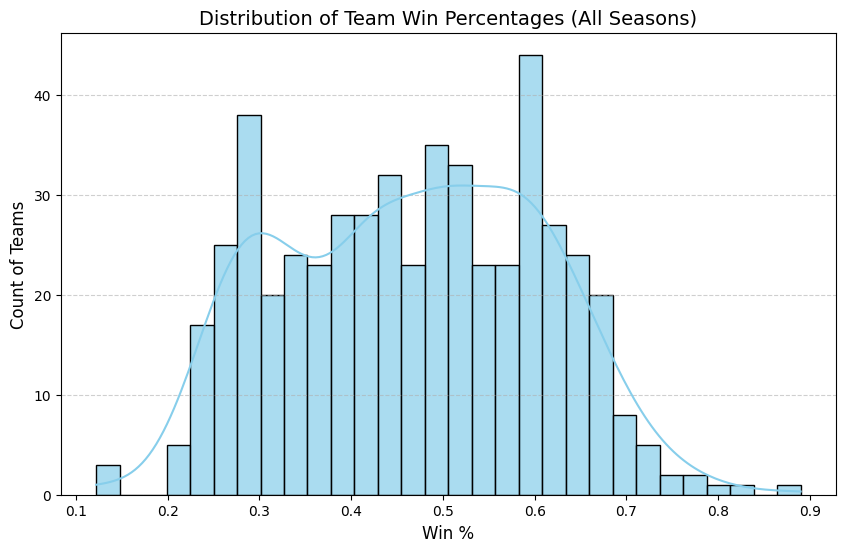

In [192]:
# Clean Distribution of Win% Across All Seasons
plt.figure(figsize=(10,6))
sns.histplot(
    data=master_train,
    x="WIN%",
    bins=30,         
    kde=True,       
    color="skyblue",  
    edgecolor="black",
    alpha=0.7
)
plt.title("Distribution of Team Win Percentages (All Seasons)", fontsize=14)
plt.xlabel("Win %", fontsize=12)
plt.ylabel("Count of Teams", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


This visualization shows the distribution of team win percentages. The shape resembles a normal distribution but with a longer right tail. I hypothesize that this extended right tail is driven by the presence of dominant dynasties between 2016 and 2022. Additionally, since teams are actively competing to maximize wins, it makes sense that there would be more observations on the far right tail (high win percentages) than on the far left tail (low win percentages).

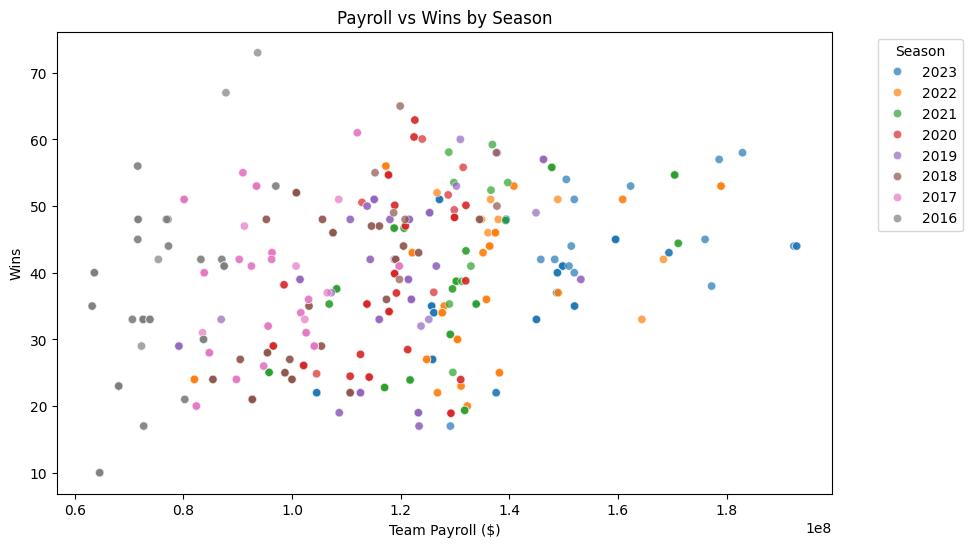

In [193]:
# Payroll vs Wins 
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=master_train,
    x="Payroll",
    y="W",
    hue=master_train["Season"].astype(str),  # force categorical
    palette="tab10",   # or "Set2", categorical palettes
    alpha=0.7
)
plt.title("Payroll vs Wins by Season")
plt.xlabel("Team Payroll ($)")
plt.ylabel("Wins")
plt.legend(title="Season", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


This visualization shows how low the correlation between Team Payroll and Team Wins is; moreover, the scatter plot shows almost no linear correlation (-0.1 < 0 < 0.1).

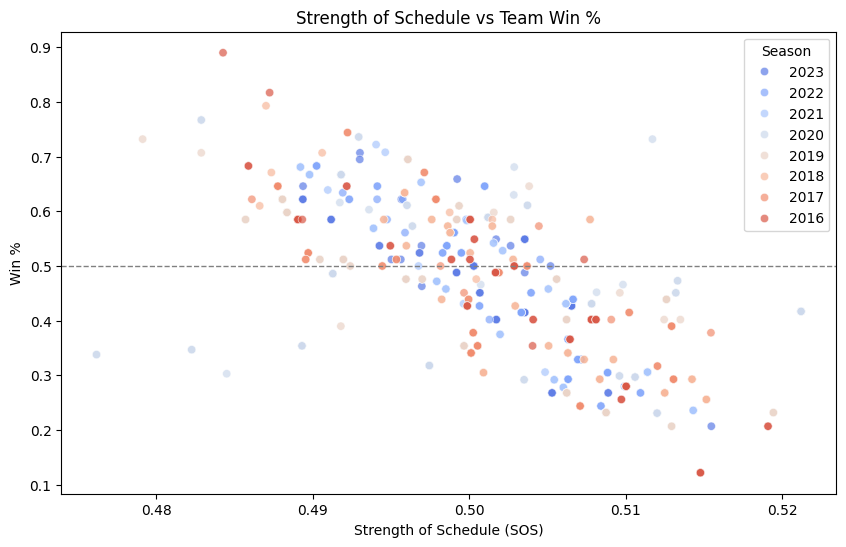

The correlation between Strength of Schedule and Win% is: -0.7094567233945883


In [194]:
# Strength of Schedule vs Win%
plt.figure(figsize=(10,6))
sns.scatterplot(data=master_train, x="SOS", y="WIN%", hue=master_train["Season"].astype(str), palette="coolwarm", alpha=0.7)
plt.title("Strength of Schedule vs Team Win %")
plt.xlabel("Strength of Schedule (SOS)")
plt.ylabel("Win %")
plt.axhline(0.5, color="gray", linestyle="--", linewidth=1)
plt.show()

print(f"The correlation between Strength of Schedule and Win% is: {master_train['SOS'].corr(master_train['WIN%'])}")

This scatterplot has the residual line at .500 (50% Wins) and there is a strong linear correlation here (> 0.6) of -0.709. We can conclude from this plot that Strength of Schedule will be a significant predictor in predicting team wins.

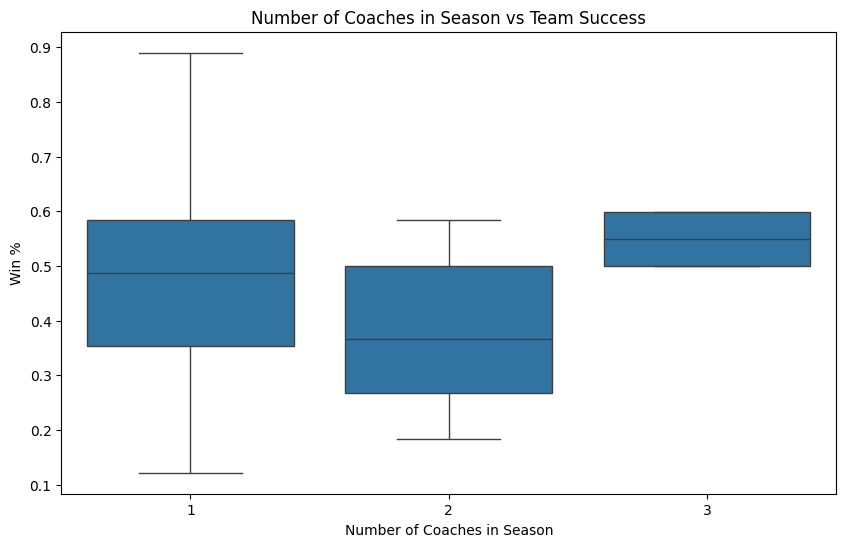

In [195]:
# Coach Tenure vs Team Success
plt.figure(figsize=(10,6))
sns.boxplot(data=master_df, x="Coach_Count", y="WIN%")
plt.title("Number of Coaches in Season vs Team Success")
plt.xlabel("Number of Coaches in Season")
plt.ylabel("Win %")
plt.show()

This plot shows that teams tend to have a lower win percentage in seasons with two head coaches, but a higher win percentage in seasons with three coaches. I hypothesize that the drop with two coaches occurs because the first coach was typically fired for poor performance, indicating the team was already struggling. In contrast, seasons with three coaches are often the result of external factors such as a coach stepping down, health issues, or other non-performance-related reasons, leading to an interim coach followed by the hiring of a permanent replacement.

Seeing this has made me wonder how impactful will be towards predicting the teams success.

### Conclusion

After looking through the code a bit more in depth, it seems that some seasons contain fewer than 30 teams due to missing front office or payroll data. This affects coverage of exploratory visualizations. Overall, this is a good start for exploring the datasets and the relationships between code. In the future, this will most lilkely be the notebook I come back to edit the most in order to find the best predictors to optimize my model.